### Imports

In [1]:
import numpy as np
import warnings

## Import from local directory
import sys
sys.path.insert(0, './fnn')
from models import LSTMEmbedding, MLPEmbedding, FNN

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
plt.rcParams['lines.linewidth'] = .02
plt.rcParams['axes.prop_cycle'] = plt.cycler(color="k") 
%matplotlib inline

%load_ext autoreload
%autoreload 2

2.4.0-dev20200727


# Geyser dataset

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


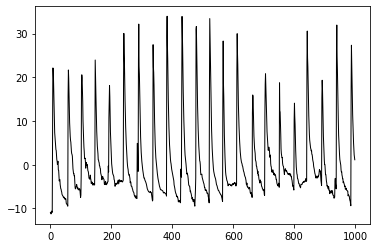

<Figure size 432x288 with 0 Axes>

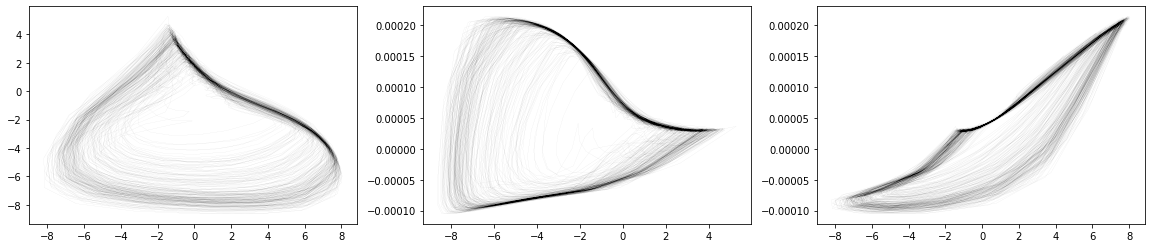

In [57]:
data = np.loadtxt('datasets/geyser_train_test.csv.gz')
plt.figure()
plt.plot(data[:1000], linewidth=1)

model = LSTMEmbedding(10, 
                     time_window=10,
                     latent_regularizer=FNN(1.0),
                     random_state=0
                     )
coords = model.fit_transform(data[:10010], learning_rate=4e-4)

plt.figure()
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,4))
ax[0].plot(coords[:,0], coords[:,1])
ax[1].plot(coords[:,1], coords[:,2])
ax[2].plot(coords[:,0], coords[:,2])

# Electricity dataset

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


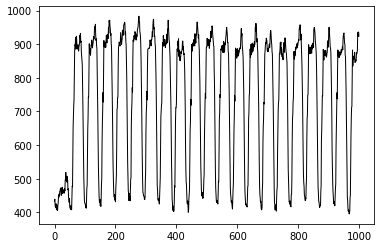

<Figure size 432x288 with 0 Axes>

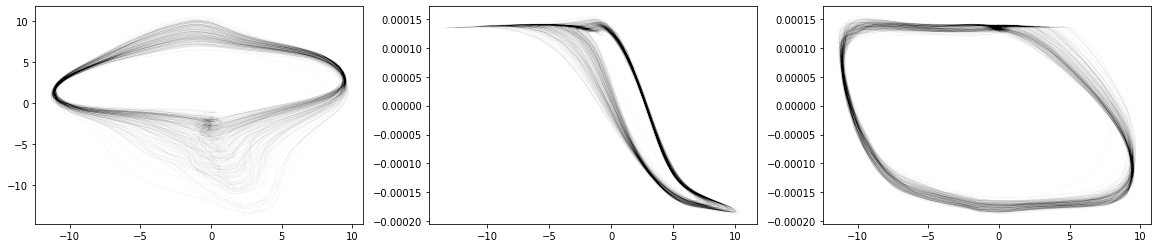

In [56]:
data = np.loadtxt('datasets/electricity_train_test.csv.gz')[::2]
plt.figure()
plt.plot(data[:1000], linewidth=1)

model = LSTMEmbedding(10, 
                     time_window=10,
                     latent_regularizer=FNN(1.0),
                     random_state=0
                     )
coords = model.fit_transform(data[:10000], learning_rate=1e-3)

plt.figure()
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,4))
ax[0].plot(coords[:,0], coords[:,1])
ax[1].plot(coords[:,1], coords[:,2])
ax[2].plot(coords[:,0], coords[:,2])

# ECG dataset

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


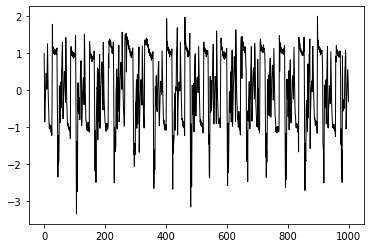

<Figure size 432x288 with 0 Axes>

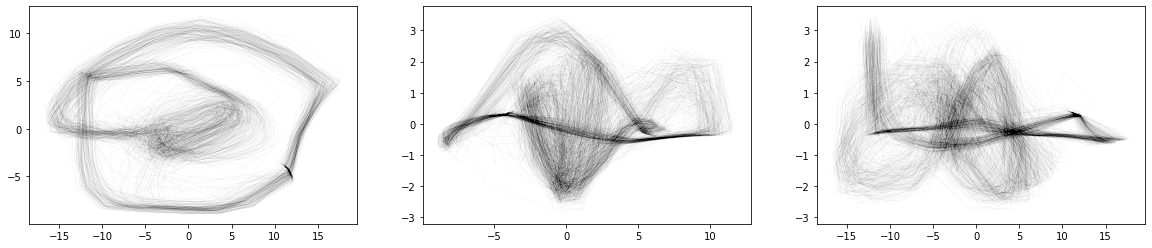

In [52]:
data = standardize_ts(np.loadtxt('datasets/ecg_test.csv.gz'))
plt.figure()
plt.plot(data[:1000], linewidth=1)

model = LSTMEmbedding(10,
                     time_window=10,
                     latent_regularizer=FNN(1e0),
                     random_state=0
                     )
coords = model.fit_transform(data[:10000], learning_rate=5e-3)

plt.figure()
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,4))
ax[0].plot(coords[:, 0], coords[:, 1])
ax[1].plot(coords[:, 1], coords[:, 2])
ax[2].plot(coords[:, 0], coords[:, 2])

# Mouse dataset

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


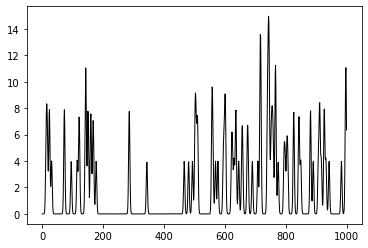

<Figure size 432x288 with 0 Axes>

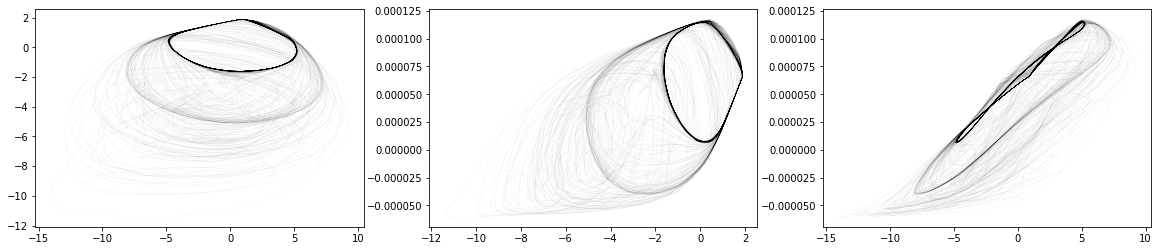

In [14]:
data = np.loadtxt('datasets/mouse.csv.gz')
plt.figure()
plt.plot(data[:1000], linewidth=1)

model = LSTMEmbedding(10, 
                     time_window=10,
                     latent_regularizer=FNN(1.0),
                     random_state=0
                     )
coords = model.fit_transform(data[:10010], learning_rate=5e-4)

plt.figure()
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,4))
ax[0].plot(coords[:,0], coords[:,1])
ax[1].plot(coords[:,1], coords[:,2])
ax[2].plot(coords[:,0], coords[:,2])